In [1]:
%matplotlib inline

import pickle
import os, random
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

dataPath = '../PedestrianData/IntentionData'
pd.__version__

'0.24.2'

#### Loading the demographic and environmental data from pickle:

In [2]:
data = pd.read_pickle('../PedestrianData/ALLDATA.pkl')

,File,Scenario,Wait Time (s),PET (s),Distace to Collision Point,Card ID,Speed Limit,Lane Width,Minimum Gap,Mean Arrival Rate,...,Vrexp_Yes,Heart_Currently,Heart_Over the years,vision_Currently,vision_Over the years,anxiety_Currently,anxiety_Over the years,Headaches_Currently,Headaches_Over the years,dizziness_Over the years
0,Jonathan Yao/2--2018-08-7--11-40-27.txt,2,43.032,0,1000,2,30,3,1.5,1100,...,1,0,0,0,0,0,0,0,0,0
1,Jonathan Yao/14--2018-08-7--11-38-35.txt,14,9.42172,1000,1000,14,40,2.5,2,530,...,1,0,0,0,0,0,0,0,0,0
2,Jonathan Yao/19--2018-08-7--11-39-16.txt,19,35.2602,0,1000,19,30,3,1.5,1100,...,1,0,0,0,0,0,0,0,0,0
3,Jonathan Yao/3--2018-08-7--11-32-11.txt,3,17.4219,0,1000,3,30,3,1,750,...,1,0,0,0,0,0,0,0,0,0
4,Jonathan Yao/48--2018-08-7--11-34-41.txt,48,27.3343,1000,1000,48,30,2.75,1,1100,...,1,0,0,0,0,0,0,0,0,0


#### Removing folder names from file values (some files are in subfolders):

In [3]:
for i in range(len(data)):
    value = data['File'].values[i].split('/')
    data['File'].values[i] = value[len(value) - 1]

### Reading three sample trials

In [4]:
while True:
    file1 = random.choice(os.listdir(dataPath))    
    file2 = random.choice(os.listdir(dataPath))    
    file3 = random.choice(os.listdir(dataPath))    
    if (data.loc[data['File'] == file1]['Wait Time (s)'].empty
        or data.loc[data['File'] == file2]['Wait Time (s)'].empty
       or data.loc[data['File'] == file3]['Wait Time (s)'].empty):
        continue
    else:
        break

crossTime1 = data.loc[data['File'] == file1]['Wait Time (s)']
crossTime2 = data.loc[data['File'] == file2]['Wait Time (s)']
crossTime3 = data.loc[data['File'] == file3]['Wait Time (s)']

width1 = data.loc[data['File'] == file1]['Lane Width']
width2 = data.loc[data['File'] == file2]['Lane Width']
width3 = data.loc[data['File'] == file3]['Lane Width']

if(data.loc[data['File'] == file1]['One way'].item() == 1):
    lane1 = 'One Way'
else:
    lane1 = "Two Way"
    
if(data.loc[data['File'] == file2]['One way'].item() == 1):
    lane2 = 'One Way'
else:
    lane2 = "Two Way"
    
if(data.loc[data['File'] == file2]['One way'].item() == 1):
    lane3 = 'One Way'
else:
    lane3 = "Two Way"

        
df1 = pd.read_csv(dataPath + '/' + file1, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin"           
                       ])
df2 = pd.read_csv(dataPath + '/' + file2, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin"           
                       ])
df3 = pd.read_csv(dataPath + '/' + file3, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin"           
                       ])




### Visualizing gaze directions over time 

Text(0.5, 0.98, '3 Sample Trials and Gaze Directions')

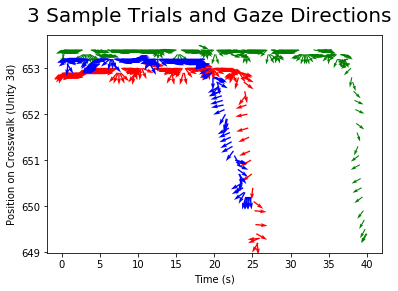

In [9]:
data_x = [crossTime1.tolist()[0], crossTime2.tolist()[0], crossTime3.tolist()[0]]
data_y = [648, 648, 648]
#plt.plot(data_x, data_y, 'or')

plt.quiver(df1["Time"], df1["Pos_z"], df1["Gaz_x"], df1["Gaz_z"], color='g')
plt.quiver(df2["Time"], df2["Pos_z"], df2["Gaz_x"], df2["Gaz_z"], color='r')
plt.quiver(df3["Time"], df3["Pos_z"], df3["Gaz_x"], df3["Gaz_z"], color='b')
plt.xlabel("Time (s)")
plt.ylabel("Position on Crosswalk (Unity 3d)")
plt.suptitle('3 Sample Trials and Gaze Directions', fontsize=20)

### Histograms of the discretized directions for head gaze
#### Includes lane type and width

Text(0.5, 0.98, 'Two Way 3.0')

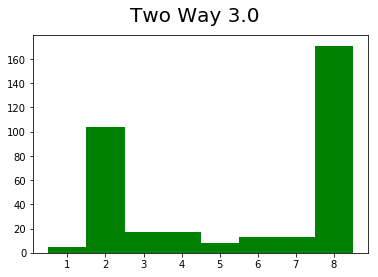

In [13]:
bins1 = df1["Gaz_Bin"]
bins2 = df2["Gaz_Bin"]
bins3 = df3["Gaz_Bin"]

plt.hist(bins1, bins=np.arange(bins1.min(), bins1.max()+2)-0.5, color='g')
plt.suptitle(lane1 + " " + str(width1.values[0]), fontsize=20)

Text(0.5, 0.98, 'Two Way:2.75')

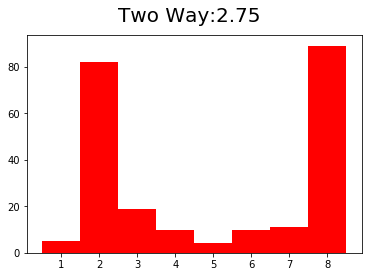

In [14]:
plt.hist(bins2, bins=np.arange(bins2.min(), bins2.max()+2)-0.5, color='r')
plt.suptitle(lane2 + ":" + str(width2.values[0]), fontsize=20)

Text(0.5, 0.98, 'Two Way:3.0')

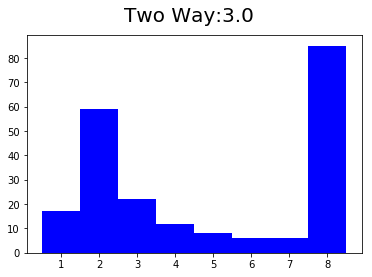

In [15]:
plt.hist(bins3, bins=np.arange(bins3.min(), bins3.max()+2)-0.5, color='b')
plt.suptitle(lane3 + ":" + str(width3.values[0]), fontsize=20)